# Téléchargement et installation des libraries

### Clonage du dépot

URL du dépot : https://github.com/tensorflow/models

In [1]:
# Installation du dépot Tensorflow Models
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 74196, done.
remote: Counting objects: 100% (282/282), done.
remote: Compressing objects: 100% (178/178), done.
remote: Total 74196 (delta 125), reused 229 (delta 95), pack-reused 73914
Receiving objects: 100% (74196/74196), 580.21 MiB | 398.00 KiB/s, done.
Resolving deltas: 100% (52537/52537), done.


Le modèle que nous allons utiliser est un modèle de reconnaissance d'objet et est nommé **ssd_mobilenet_V2**.

Le tableau à cette adresse récapitule les informations des différents modèles disponnibles. Il permet également d'obtenir les liens pour les télécharger : https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

### Installation des librairies Python

L'adresse suivante exlique comment installer les librairies Python pour utiliser les modèles : https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2.md

In [3]:
%cd models/research

# Compile protos.
!protoc object_detection/protos/*.proto --python_out=.

# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python3 -m pip install .

[Errno 2] No such file or directory: 'models/research'
/home/alexandre/Jetbot/Notebooks/Suivi_Objet/models/research
Defaulting to user installation because normal site-packages is not writeable
Processing /home/alexandre/Jetbot/Notebooks/Suivi_Objet/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 11.2 MB 36 kB/s             
     |████████████████████████████████| 352 kB 230 kB/s            
     |████████████████████████████████| 106 kB 324 kB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 1.8 MB 263 kB/s            
ERROR: Could not find a version that satisfies the requirement tensorflow_io (from object-detection) (from versions: none)
ERROR: No matching distribution found for tensorflow_io


# Téléchargement du modèle et configuration de l'environnement

### Téléchargement du modèle

In [23]:
%cd ../..

/home/alexandre/Jetbot/Notebooks/Suivi_Objet


In [24]:
# Téléchargement du modèle ssd_mobilenet_v2

!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!tar -zxf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!rm ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2022-06-05 18:54:15--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 216.58.206.240, 2a00:1450:4007:809::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|216.58.206.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19,56M   323KB/s    in 2m 49s  

2022-06-05 18:57:04 (118 KB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



Après le téléchargement, on exporte le modèle en utilisant les propriétés du fichier de configuration `pipeline.config` et en utlisant les fichiers `checkpoint`. Pour cela on utilise le programme `TensorFlow Object Detection Exporter`. 

### Configuration des variables d'environnement

In [1]:
!echo $PYTHONPATH

In [2]:
!pwd

/home/alexandre/Jetbot/Notebooks/Suivi_Objet


In [3]:
%set_env PYTHONPATH="/env/python:/home/alexandre/Jetbot/Notebooks/Suivi_Objet/models/research:/home/alexandre/Jetbot/Notebooks/Suivi_Objet/models/research/slim:/home/alexandre/Jetbot/Notebooks/Suivi_Objet/models"

env: PYTHONPATH="/env/python:/home/alexandre/Jetbot/Notebooks/Suivi_Objet/models/research:/home/alexandre/Jetbot/Notebooks/Suivi_Objet/models/research/slim:/home/alexandre/Jetbot/Notebooks/Suivi_Objet/models"


In [4]:
!mkdir tfmodel_ssd_mobilenet_v2_320x320_coco17_tpu-8

mkdir: cannot create directory ‘tfmodel_ssd_mobilenet_v2_320x320_coco17_tpu-8’: File exists


### Installation des packages supplémentaires

In [51]:
!pip3 install tf_slim

Defaulting to user installation because normal site-packages is not writeable
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)


### Editer le fichier : deepmac_meta_arch.py
Commenter les lignes suivantes :

    if tf_version.is_tf2():
    import tensorflow_io as tfio

### Copier le répertoire models/official dans /usr/local/lib/python3.6/dist-packages

Entrer la commande suivante dans un terminal:

    sudo cp -r models/official /usr/local/lib/python3.6/dist-packages

# Création du modèle pré-entrainé

In [6]:
!python3 models/research/object_detection/exporter_main_v2.py --input_type float_image_tensor --trained_checkpoint_dir ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ --pipeline_config_path ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config --output_directory tfmodel_ssd_mobilenet_v2_320x320_coco17_tpu-8

2022-06-05 19:35:39.435148: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1017] ARM64 does not support NUMA - returning NUMA node zero
2022-06-05 19:35:39.453055: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1017] ARM64 does not support NUMA - returning NUMA node zero
2022-06-05 19:35:39.453375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1017] ARM64 does not support NUMA - returning NUMA node zero
2022-06-05 19:35:39.490543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1017] ARM64 does not support NUMA - returning NUMA node zero
2022-06-05 19:35:39.490876: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1017] ARM64 does not support NUMA - returning NUMA node zero
2022-06-05 19:35:39.491106: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1017] ARM64 does not support NUMA - returning NUMA node zero
2022-06-05 19:35:45.049322: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1017] ARM64 does not support NUMA - returning NUMA no

# Utilisation du modèle

Le modèle est maintenant prêt à être utilisé. Le script ci-dessous télécharge une image et effectue un pré-traitement sur celle-ci. Ensuite, elle est envoyée dans le modèle SSD MobileNet V2 de TensorFlow, puis un inférence est lancée. 

### Informations sur le modèle

L'entrée du modèle est une image de dimension 320x320 au format [1,320,320,3] avec des valeurs codées en UINT8.

In [8]:
!saved_model_cli show --dir tfmodel_ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_tensor'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, -1, -1, 3)
        name: serving_default_input_tensor:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['detection_anchor_indices'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 100)
        name: StatefulPartitionedCall:0
    outputs['detection_boxes'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 100, 4)
        name: StatefulPartitionedCall:1
    outputs[

### Chargement du modèle

In [9]:
import tensorflow as tf

model_path = "tfmodel_ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model"
model = tf.saved_model.load(model_path)

### Chargement d'une image dans le tenseur d'entrée

In [11]:
from PIL import Image
import numpy as np
from io import BytesIO

img_data = tf.io.gfile.GFile('models/research/object_detection/test_images/image2.jpg', 'rb').read()
image = Image.open(BytesIO(img_data))
(im_width, im_height) = image.size
image_np  = np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)
input_tensor = np.expand_dims(image_np, 0)

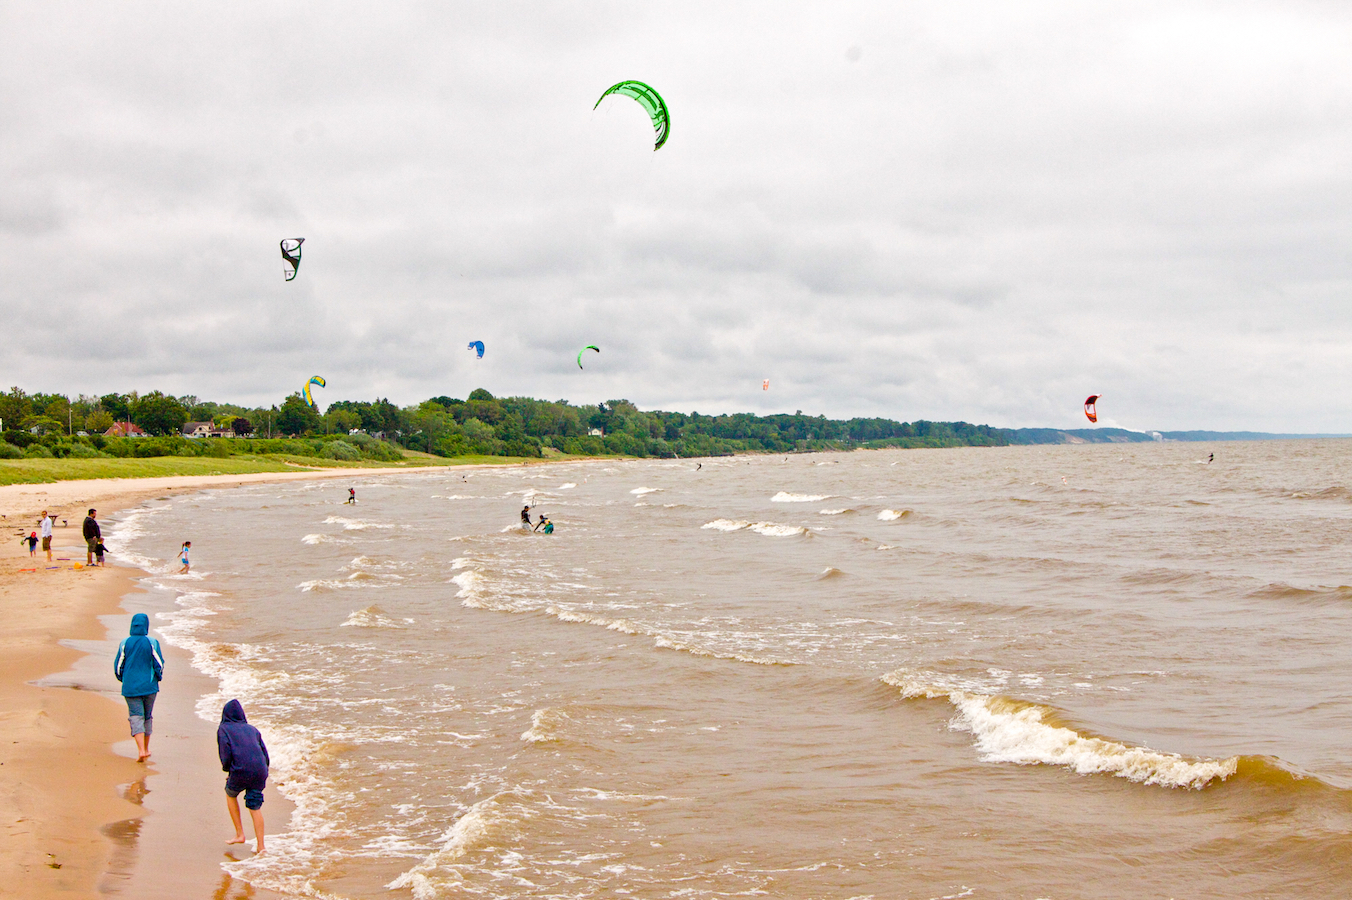

In [12]:
image

### Traitement de l'image avec le modèle

In [13]:
detections = model(input_tensor)

### Structure de la sortie

La sortie est un dictionnaire qui contient les informations suivantes :
- `num_detections` : Tenseur au format [N] (type tf.int) qui contient le nombre de détections.
- `detection_boxes` : Tenseur au format [N,4] (type tf.float32) qui contient les coordonnées des boites au format [ymin, xmin, ymax, xmax].
- `detection_classes` : Tenseur au format [N] (type tf.int) qui contient l'index des classes contenues dans le fichier des labels.
- `detection_scores` : Tenseur au format [N] (type tf.float32) qui contient les scores de détection.
- `raw_detection_boxes` : Tenseur au format [1,M,4] (type tf.float32) qui contient les coordonnées des boites sans supressions Non-Max.
- `raw_detection_scores` : Tenseur au format [1,M,91] (type tf.float32) qui contient les scores des classes au format logits des boites précédentes.
- `detection_anchor_indices` : Tenseur au format [N] (type tf.float32) qui contient les indices des ancres des détections après suppression Non-Max.
- `detection_multiclass_scores` : Tenseur au format [1,N,91] qui contient les scores des classes (avec le fond) des boites de détections.

In [14]:
detections

{'raw_detection_scores': <tf.Tensor: shape=(1, 12804, 91), dtype=float32, numpy=
 array([[[0.00341336, 0.00285684, 0.00185393, ..., 0.00090723,
          0.00117251, 0.00211519],
         [0.00197495, 0.00190145, 0.00133062, ..., 0.00086231,
          0.00095234, 0.00124136],
         [0.0025159 , 0.00506486, 0.00186245, ..., 0.00107333,
          0.00105944, 0.00277158],
         ...,
         [0.0046335 , 0.01125538, 0.00401269, ..., 0.00376171,
          0.00378059, 0.00372303],
         [0.00385134, 0.00595137, 0.00267989, ..., 0.0022084 ,
          0.0036308 , 0.00289762],
         [0.00331158, 0.00818066, 0.00362302, ..., 0.00281555,
          0.00350887, 0.0033544 ]]], dtype=float32)>,
 'raw_detection_boxes': <tf.Tensor: shape=(1, 12804, 4), dtype=float32, numpy=
 array([[[ 8.1415083e-03,  1.6358094e-02,  2.1848507e-02,  3.5428263e-02],
         [-4.5732610e-02, -4.8466325e-02,  8.6850725e-02,  1.0120447e-01],
         [ 8.1145791e-03,  3.4695137e-03,  2.0828452e-02,  4.0290467e

In [15]:
detections['detection_boxes']

<tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
array([[[8.85405391e-02, 4.41545039e-01, 1.75880179e-01, 5.03278196e-01],
        [7.66457796e-01, 1.56729415e-01, 9.47091341e-01, 2.04917833e-01],
        [6.72406912e-01, 8.18403810e-02, 8.36201072e-01, 1.21160910e-01],
        [5.73632658e-01, 4.08536382e-02, 6.15342557e-01, 5.59646599e-02],
        [5.64105272e-01, 3.89599323e-01, 6.02994919e-01, 4.06267762e-01],
        [5.87014616e-01, 4.20988500e-02, 6.27363026e-01, 5.79569712e-02],
        [5.59926271e-01, 6.14350140e-02, 6.24867558e-01, 8.06958079e-02],
        [2.74268329e-01, 2.15546891e-01, 3.05612862e-01, 2.30178013e-01],
        [5.72875977e-01, 2.55191401e-02, 6.23913169e-01, 3.96331176e-02],
        [4.29079413e-01, 3.76701355e-04, 6.62695289e-01, 8.43861818e-01],
        [2.64185607e-01, 2.07290068e-01, 3.09662342e-01, 2.28931323e-01],
        [3.80027533e-01, 4.01714057e-01, 4.05395746e-01, 4.17312950e-01],
        [3.77331108e-01, 3.50018561e-01, 4.05952007e-01, 3.

In [16]:
detections['detection_boxes'][0,0,:].numpy()

array([0.08854054, 0.44154504, 0.17588018, 0.5032782 ], dtype=float32)

### Affichage des résultats

Dessine les boites sur les trois premiers objets détectés :

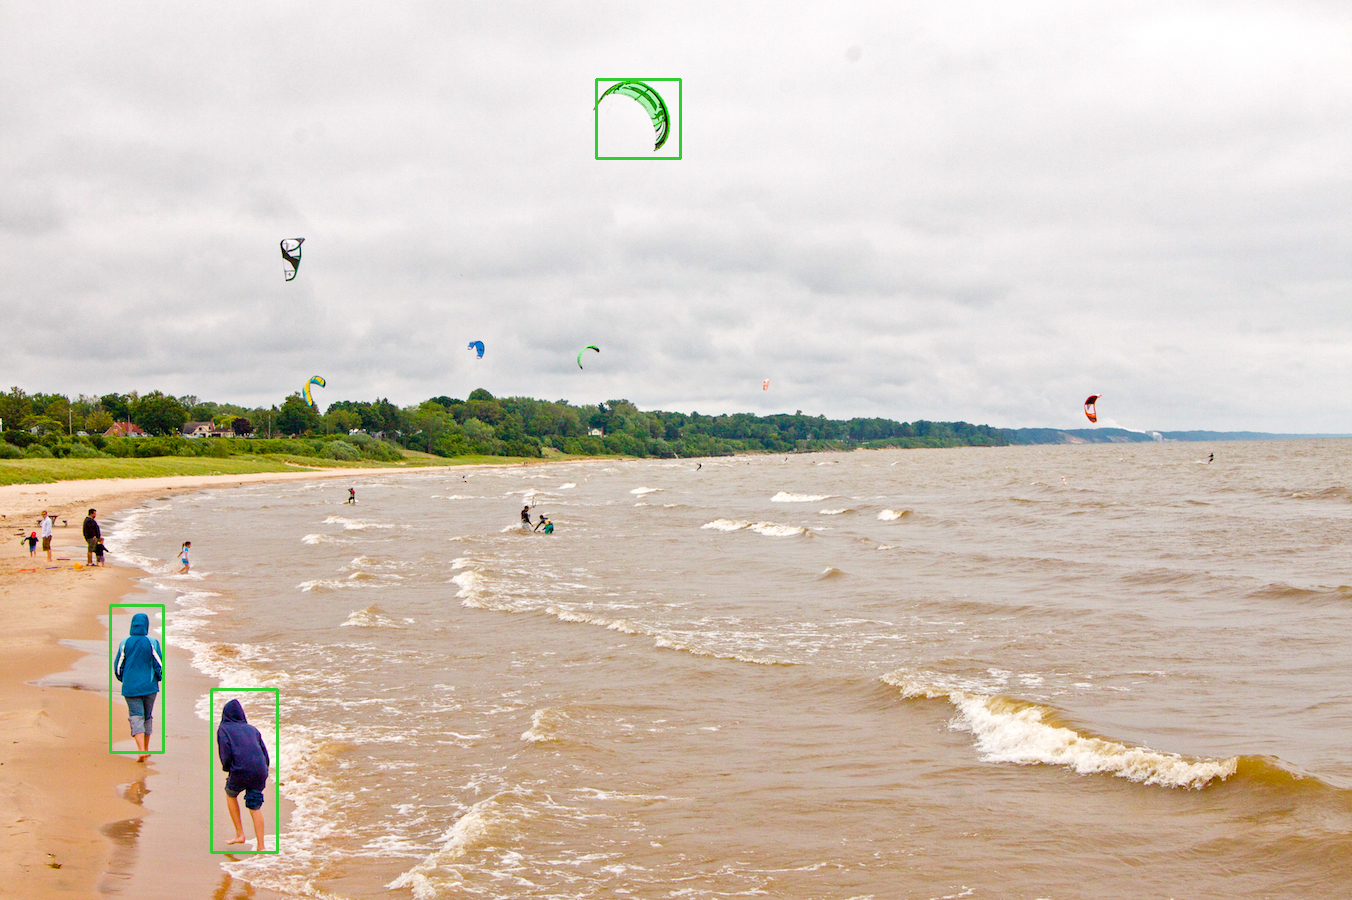

In [17]:
from PIL import ImageDraw
from io import BytesIO


def draw_bbox_and_label_in_image(img, boxes, num_detections, box_width=3):
    """
    Draw bounding boxes and class labels in images
    :param img: PIL Image or np arrays
    :param boxes: in size [num_detections, 4], contains xys or boxes
    :param box_width: the width of boxes
    :return: Image
    """

    draw = ImageDraw.Draw(img)
    width, height = img.size

    for i in range(num_detections):
        ymin, xmin, ymax, xmax = boxes[i]

        ymin = int(ymin * height)
        ymax = int(ymax * height)
        xmin = int(xmin * width)
        xmax = int(xmax * width)

        class_color = "LimeGreen"

        draw.line([(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax), (xmin, ymin)], width=box_width, fill=class_color)

    return img

draw_image = draw_bbox_and_label_in_image(image, detections['detection_boxes'][0,0:3,:],3)
draw_image

In [19]:
print ("Classe du 1er objet : %d (score : %)" %(detections['detection_classes'][0,0]))
print ("Classe du 2eme objet : %d" %(detections['detection_classes'][0,1]))
print ("Classe du 3eme objet : %d" %(detections['detection_classes'][0,2]))

Classe du 1er objet : 38
Classe du 2eme objet : 1
Classe du 3eme objet : 1
